In [1]:
import pandas as pd
import scipy
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice

from JC_functions import *
from JC_momenst import *
from utils import extract_contour_from_mask, ensure_ccw


In [2]:

folder_path = r"D:\_WPI\PAPER_4\data\Tetrapod120-Original"
png_files = glob(os.path.join(folder_path, "*.jpg"))
contours = []
for file in png_files:
    try:
        contour = extract_contour_from_mask(file)
        contours.append(contour)
    except ValueError as e:
        print(e)
contours = ensure_ccw(contours)
labels = np.repeat(np.arange(6), 20)
N= len(contours)

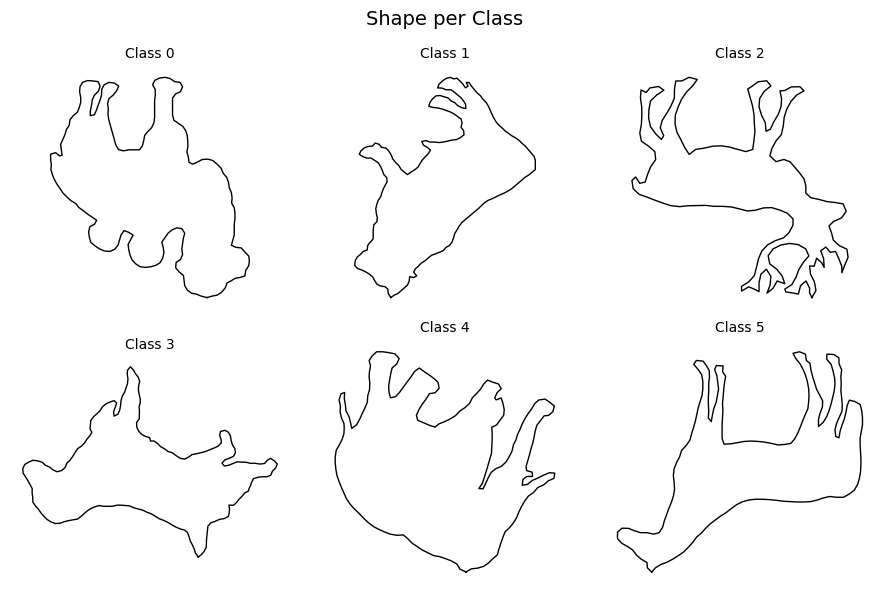

In [3]:
complex_contours = np.array([Normalize(shape_to_complex(reparametrize_by_arc_length(contours[i], 200, False)[1][:-1])) for i in range(N)])

shape_per_class = one_polygon_per_class(complex_contours, labels)

classes = sorted(shape_per_class.keys())
n_classes = len(classes)

# ---- Create grid dynamically ----
ncols = 3
nrows = int(np.ceil(n_classes / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(3 * ncols, 3 * nrows))
axes = np.atleast_1d(axes).ravel()

# ---- Plot ----
for ax, lab in zip(axes, classes):
    plot_polygon(ax, shape_per_class[lab], color="black", lw=1)
    ax.set_title(f"Class {lab}", fontsize=10)

# ---- Remove unused axes ----
for ax in islice(axes, n_classes, None):
    ax.remove()

plt.suptitle("Shape per Class", fontsize=14)
plt.tight_layout()
plt.show()


In [4]:
feature_dicts = [features_13(remove_duplicate_vertices(leaf)) for leaf in complex_contours]

feature_names = list(feature_dicts[0].keys())
X_real = np.array([
    [fd[name].real if np.iscomplexobj(fd[name]) else fd[name]
     for name in feature_names]
    for fd in feature_dicts
], dtype=float)

X_imag = np.array([
    [fd[name].imag if np.iscomplexobj(fd[name]) else 0.0
     for name in feature_names]
    for fd in feature_dicts
], dtype=float)

X = np.concatenate([X_real, X_imag], axis=1)

Dimension of ambient space: 26,
Estimated global dimension: 10,
The estimated dimensions per class are: [8 7 7 7 7 7], 
Upper bound local dimension = 8, 
Centroids positions = [[-2.52785549  0.35773727]
 [-1.58317909 -0.84911102]
 [ 2.78958778 -1.18522674]
 [ 1.096549    1.37246076]
 [-2.82991481 -0.07263458]
 [ 2.69761233  0.19171302]]


C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(


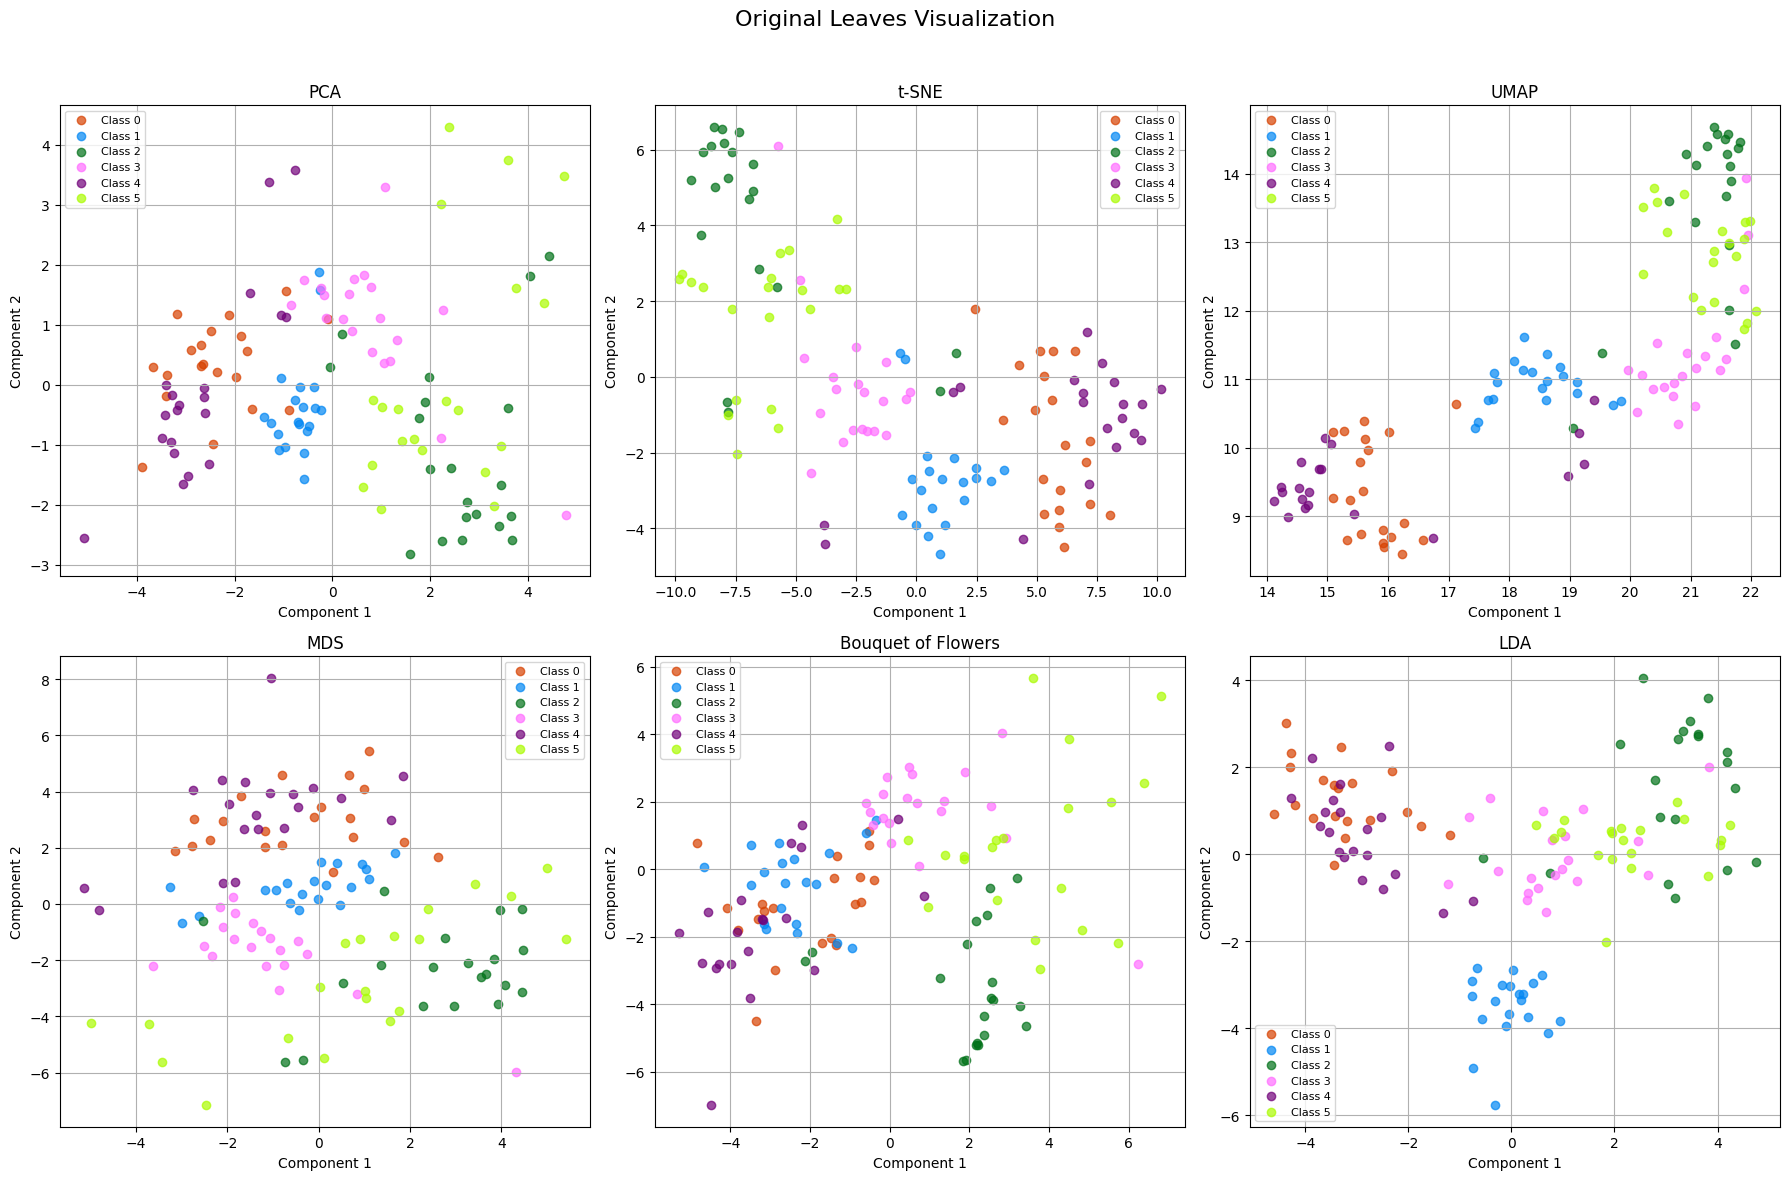

In [5]:
labels = np.asarray(labels).astype(int)
plot_2D(X, labels)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

RF_classifier(X_scaled, labels)


Test accuracy: 0.9000

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       0.75      0.60      0.67         5
           5       1.00      1.00      1.00         5

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Confusion matrix:
[[4 0 0 0 1 0]
 [0 5 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 5 0 0]
 [1 1 0 0 3 0]
 [0 0 0 0 0 5]]
